In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns

In [2]:
covid_df = pd.read_csv('data/covid_df.csv')

In [3]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


## Основные параметры метода histplot()

data — DataFrame, по которому строится график;

x — признак, который будет отложен по оси абсцисс;

y — признак, который будет отложен по оси ординат;

hue — группировочный категориальный признак, который позволяет строить отдельный график для каждой категории (не стоит использовать его для гистограмм, но он широко используется для других видов графиков в Seaborn);

ax — система координат Matplotlib, в которой строится график;

color — цвет графика;

bins — число столбцов в гистограмме (по умолчанию вычисляется автоматически с помощью специальных формул);

kde — параметр, указывающий, стоит ли сглаживать гистограмму кривой (по умолчанию False).

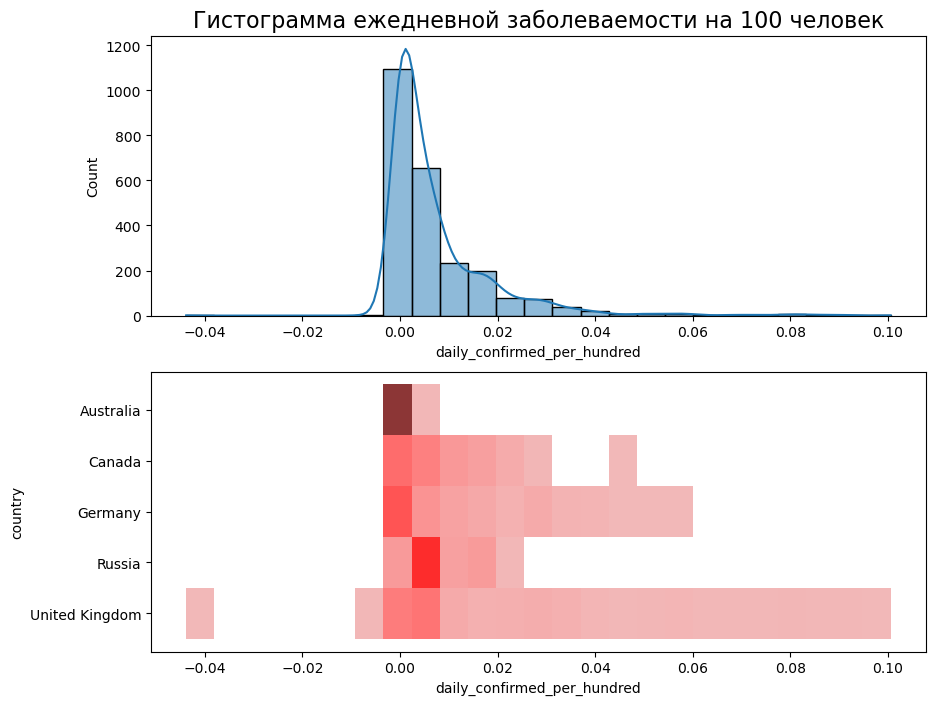

In [4]:
# Построим сразу две гистограммы: одна будет иллюстрировать общее распределение ежедневной заболеваемости (daily_confirmed), 
# а вторая — то же распределение в разрезе стран. 
# Для этого создаём две координатные плоскости с помощью метода subplots(). 
# На первой координатной плоскости рисуем простую гистограмму с 25 столбцами, а также добавим на неё сглаживающую кривую. 
# На второй гистограмме добавляем параметр названия страны по оси y. В таком случае количество наблюдений будет обозначаться 
# на диаграмме яркостью цвета (чем темнее полоса, тем больше наблюдений находится в интервале).

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);

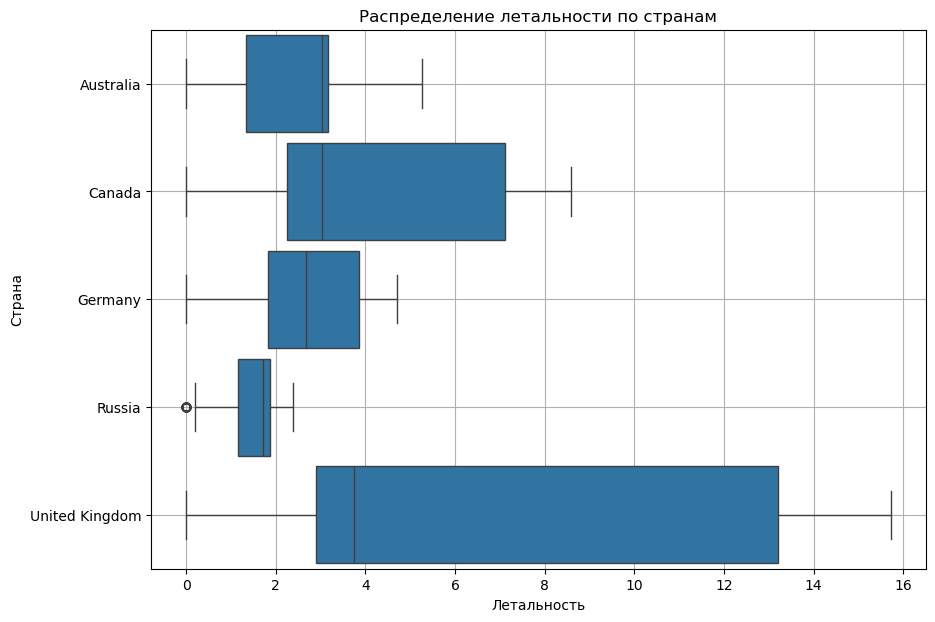

In [5]:
# Коробчатые диаграммы в Seaborn строятся с помощью метода boxplot().
# Ящики отразим горизонтально (для этого по оси x отложим признак летальности, а по оси y — страны), 
# параметр orient отвечает за ориентацию диаграммы, а width — за ширину коробок:

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

In [6]:
croped_covid_df['date'] = pd.to_datetime(croped_covid_df['date'])

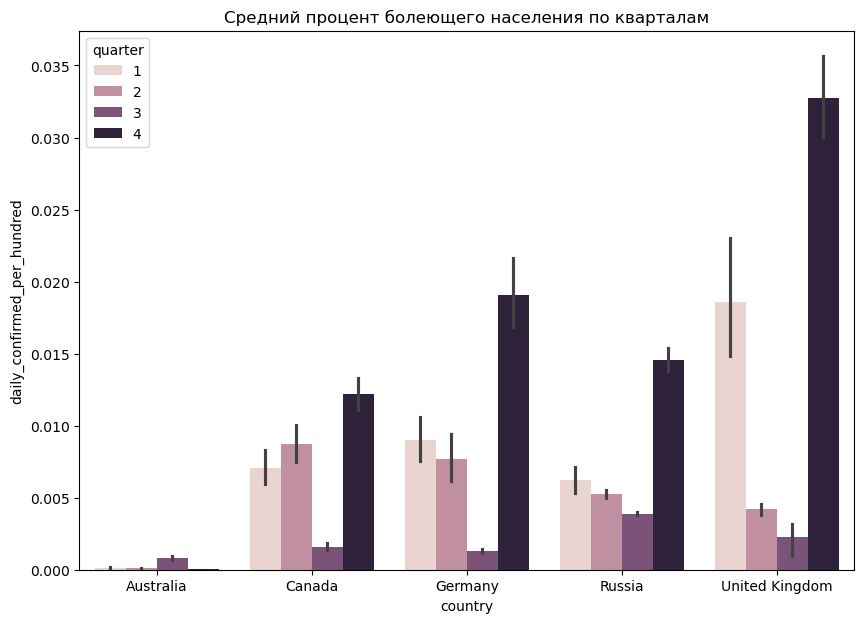

In [7]:
# Для построения столбчатых диаграмм в Seaborn используется метод barplot(). 
# По умолчанию метод отображает среднее по столбцу, который указан в параметре x 
# (вместо среднего можно вычислить и любую другую статистическую характеристику, наименование которой задаётся в параметре estimator). 
# Для добавления многоуровневости используется параметр hue, который позволяет группировать данные по признаку:

fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');

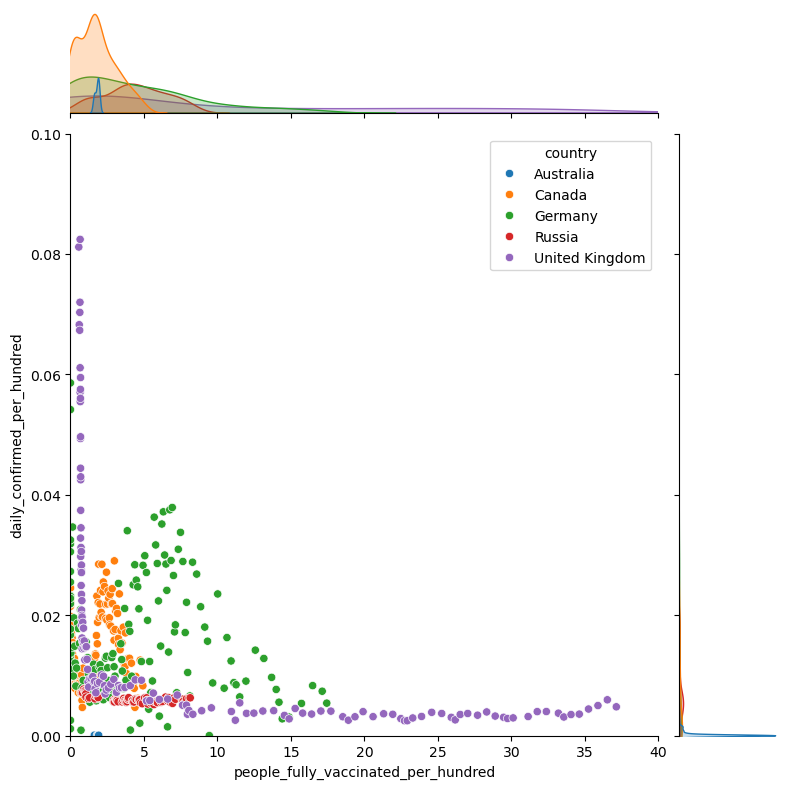

In [8]:
# Построим один из самых любимых дата-сайентистами графиков — jointplot() — в котором совмещены диаграмма рассеяния и гистограмма. 
# Это довольно удобный и полезный инструмент, когда мы хотим одновременно посмотреть и на распределения переменных, и сразу оценить их взаимосвязь.

# Построим jointplot зависимости ежедневной заболеваемости в странах от общей численности населения в процентах (daily_confirmed_per_hundred) 
# от числа полностью вакцинированных в процентах (people_fully_vaccinated_per_hundred).

# Параметры xlim и ylim определяют диапазон отображения осей x и y. Параметр height отвечает за высоту и ширину графика (он квадратный).

jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)

In [9]:
# Допустим, мы хотим сравнить темпы вакцинации по странам во времени. Вы, скорее всего, сразу подумали о линейном графике. Но давайте мыслить шире. 
# Когда мы хотим сравнить скорость изменения показателей по малому количеству категорий (в данном случае — по странам, а их у нас их всего пять), 
# нагляднее всего будет тепловая карта.

# Предварительно создадим сводную таблицу: по столбцам отложим признак даты, а по строкам — страны. В ячейках таблицы будет находиться 
# процент вакцинированных (первым компонентом) людей в стране на определённую дату. Чтобы даты отображались на тепловой карте верно, их 
# необходимо привести к типу string.

pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


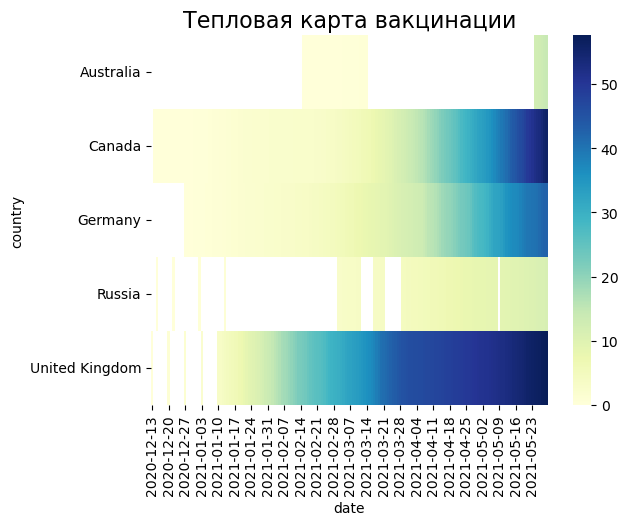

In [10]:
# Для построения тепловой карты в Seaborn используется метод heatmap(). Данный метод работает с табличными данными и визуализирует все ячейки таблицы с помощью цвета. 
# Параметр annot отвечает за отображение легенды (аннотации), параметр cmap — за цветовую гамму графика.

heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

In [11]:
croped_covid_df['confirmed_per_hundred'] = (croped_covid_df['confirmed'] / croped_covid_df['population']) * 100

In [12]:
piv_cov = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country'
)
piv_cov.columns = piv_cov.columns.astype('string')
print(piv_cov)

date            2020-01-23  2020-01-25  2020-01-26  2020-01-27  2020-01-28  \
country                                                                      
Australia              0.0    0.000016    0.000016    0.000019    0.000019   
Canada                 NaN         NaN    0.000003    0.000003    0.000005   
Germany                NaN         NaN         NaN         NaN    0.000005   
Russia                 NaN         NaN         NaN         NaN         NaN   
United Kingdom         NaN         NaN         NaN         NaN         NaN   

date            2020-01-29  2020-01-30  2020-01-31  2020-02-01  2020-02-02  \
country                                                                      
Australia         0.000019    0.000035    0.000035    0.000047    0.000047   
Canada            0.000005    0.000008    0.000008    0.000011    0.000011   
Germany           0.000005    0.000005    0.000006    0.000010    0.000012   
Russia                 NaN         NaN    0.000001    0.000001 

Text(0.5, 1.0, 'Процент от общего населения')

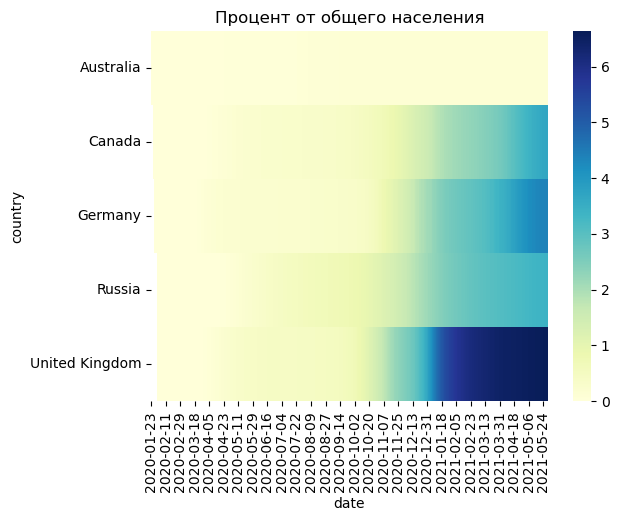

In [13]:
tempmep = sns.heatmap(data=piv_cov, cmap='YlGnBu')
tempmep.set_title('Процент от общего населения')

In [14]:
fig = plt.figure(figsize=(10, 7))
nashbox = sns.boxplot(
    data=croped_covid_df,
    y='coutry',
    x='recover_rate'
    orient='h',
    width=0.9
)
nashbox.set_title('Выздровляемость');
nashbox.set_xlabel('recover rate');
nashbox.set_ylabel('CTPAHA');
nashbox.grid()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3874900697.py, line 5)

# Plotly

In [33]:
import plotly
import plotly.express as px
print(plotly.__version__)

5.15.0
